In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
digits.target[:5]

array([0, 1, 2, 3, 4])

<Figure size 640x480 with 0 Axes>

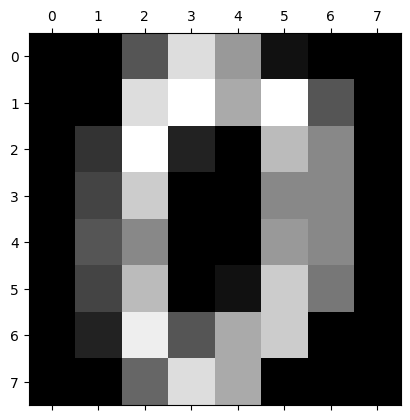

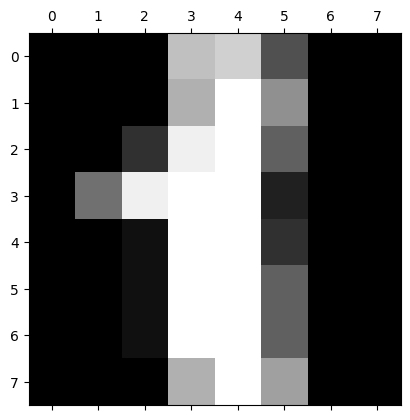

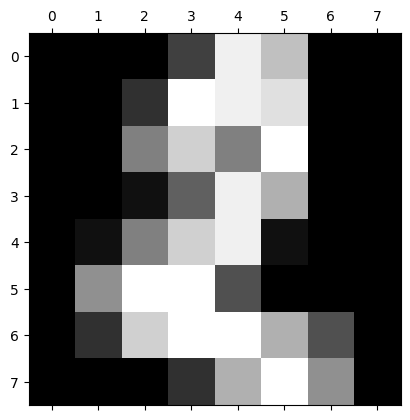

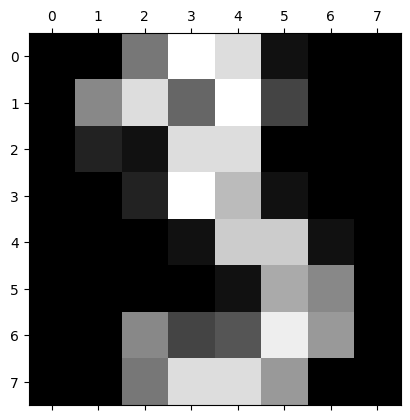

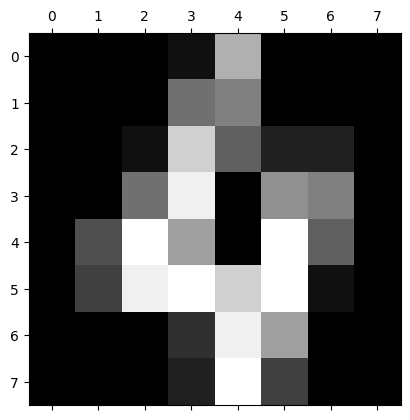

In [13]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

In [15]:
df = pd.DataFrame(digits.data, digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [16]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [18]:
df['digit'] = df.target.apply(lambda x:digits.target_names[x])
df[30:40]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target,digit
0,0.0,0.0,10.0,14.0,11.0,3.0,0.0,0.0,0.0,4.0,16.0,13.0,6.0,14.0,1.0,0.0,0.0,4.0,16.0,2.0,0.0,11.0,7.0,0.0,0.0,8.0,16.0,0.0,0.0,10.0,5.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,4.0,0.0,0.0,8.0,16.0,0.0,1.0,16.0,1.0,0.0,0.0,4.0,16.0,1.0,11.0,15.0,0.0,0.0,0.0,0.0,11.0,16.0,12.0,3.0,0.0,0.0,0,0
9,0.0,0.0,2.0,13.0,8.0,0.0,0.0,0.0,0.0,0.0,6.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,5.0,15.0,13.0,11.0,0.0,0.0,0.0,0.0,0.0,7.0,16.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,11.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,16.0,2.0,0.0,0.0,2.0,15.0,13.0,14.0,13.0,2.0,9,9
5,0.0,2.0,13.0,16.0,16.0,16.0,11.0,0.0,0.0,5.0,16.0,10.0,5.0,4.0,1.0,0.0,0.0,6.0,16.0,7.0,3.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,16.0,6.0,0.0,0.0,0.0,3.0,8.0,4.0,11.0,15.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,15.0,0.0,0.0,0.0,0.0,4.0,13.0,16.0,6.0,0.0,0.0,0.0,2.0,16.0,15.0,8.0,0.0,0.0,0.0,5,5
5,0.0,6.0,13.0,5.0,8.0,8.0,1.0,0.0,0.0,8.0,16.0,16.0,16.0,16.0,6.0,0.0,0.0,6.0,16.0,9.0,6.0,4.0,0.0,0.0,0.0,6.0,16.0,16.0,15.0,5.0,0.0,0.0,0.0,0.0,4.0,5.0,15.0,12.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,9.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,3.0,0.0,0.0,0.0,4.0,16.0,15.0,3.0,0.0,0.0,0.0,5,5
6,0.0,0.0,0.0,5.0,14.0,2.0,0.0,0.0,0.0,0.0,1.0,13.0,11.0,0.0,0.0,0.0,0.0,0.0,5.0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,15.0,5.0,0.0,0.0,0.0,0.0,1.0,15.0,16.0,15.0,11.0,1.0,0.0,0.0,2.0,13.0,14.0,1.0,12.0,9.0,0.0,0.0,0.0,4.0,16.0,7.0,13.0,9.0,0.0,0.0,0.0,0.0,5.0,16.0,15.0,3.0,0.0,6,6
5,0.0,3.0,15.0,8.0,8.0,6.0,0.0,0.0,0.0,4.0,16.0,16.0,16.0,13.0,2.0,0.0,0.0,3.0,16.0,9.0,2.0,0.0,0.0,0.0,0.0,2.0,16.0,16.0,15.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,12.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,10.0,0.0,0.0,0.0,0.0,5.0,14.0,15.0,2.0,0.0,0.0,0.0,1.0,15.0,14.0,1.0,0.0,0.0,0.0,5,5
0,0.0,0.0,6.0,14.0,10.0,2.0,0.0,0.0,0.0,0.0,15.0,15.0,13.0,15.0,3.0,0.0,0.0,2.0,16.0,10.0,0.0,13.0,9.0,0.0,0.0,1.0,16.0,5.0,0.0,12.0,5.0,0.0,0.0,0.0,16.0,3.0,0.0,13.0,6.0,0.0,0.0,1.0,15.0,5.0,6.0,13.0,1.0,0.0,0.0,0.0,16.0,11.0,14.0,10.0,0.0,0.0,0.0,0.0,7.0,16.0,11.0,1.0,0.0,0.0,0,0
9,0.0,0.0,13.0,10.0,1.0,0.0,0.0,0.0,0.0,5.0,16.0,14.0,7.0,0.0,0.0,0.0,0.0,4.0,16.0,8.0,14.0,0.0,0.0,0.0,0.0,2.0,14.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,4.0,9.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,6.0,0.0,0.0,0.0,5.0,8.0,5.0,9.0,14.0,0.0,0.0,0.0,13.0,13.0,15.0,16.0,13.0,0.0,9,9
8,0.0,0.0,7.0,7.0,13.0,16.0,4.0,0.0,0.0,0.0,13.0,13.0,6.0,12.0,7.0,0.0,0.0,0.0,10.0,4.0,10.0,11.0,1.0,0.0,0.0,0.0,8.0,16.0,10.0,0.0,0.0,0.0,0.0,3.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,11.0,5.0,0.0,0.0,0.0,0.0,4.0,10.0,9.0,8.0,0.0,0.0,0.0,0.0,1.0,11.0,16.0,6.0,0.0,0.0,0.0,8,8
9,0.0,1.0,9.0,16.0,13.0,7.0,0.0,0.0,0.0,7.0,14.0,4.0,10.0,12.0,0.0,0.0,0.0,6.0,15.0,9.0,16.0,11.0,0.0,0.0,0.0,0.0,9.0,11.0,7.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,6.0,0.0,0.0,3.0,13.0,8.0,5.0,14.0,5.0,0.0,0.0,0.0,9.0,14.0,13.0,10.0,1.0,0.0,9,9


In [20]:
inputs = df.drop(['target', 'digit'], axis='columns')
target = df.target

**train test split**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

**knn classifier**

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
knn.score(X_test, y_test)

0.9888888888888889

**tried various k values and 3 gives the best score**

In [43]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 29]])

Text(58.222222222222214, 0.5, 'Truth')

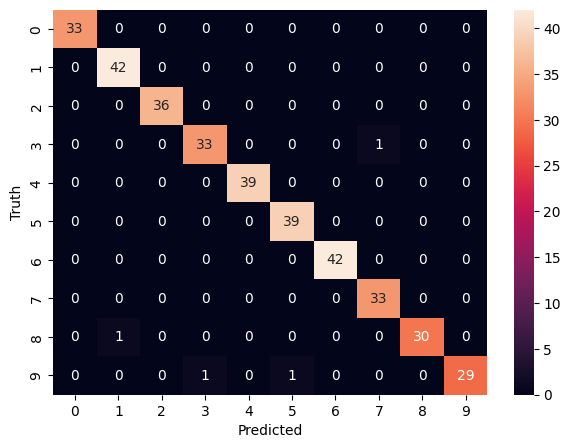

In [44]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.98      1.00      0.99        42
           2       1.00      1.00      1.00        36
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        39
           5       0.97      1.00      0.99        39
           6       1.00      1.00      1.00        42
           7       0.97      1.00      0.99        33
           8       1.00      0.97      0.98        31
           9       1.00      0.94      0.97        31

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

